In [24]:
#calling the packages which will be used throughout the notebook.

import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [35]:
#reading the data
train=pd.read_csv("C:/Users/COM/Downloads/Train_SU63ISt.csv")
test=pd.read_csv("C:/Users/COM/Downloads/Test_0qrQsBZ.csv")

#We need to make a copy of the dataset
train_copy=train.copy()
test_copy=test.copy()
train_original=train.copy()
test_original=test.copy()

In [26]:
#Take a look at the different columns in the both the dataset
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [27]:
test.columns


Index(['ID', 'Datetime'], dtype='object')

In [28]:
#Let’s understand each feature first:

#ID is the unique number given to each observation point.
#Datetime is the time of each observation.
#Count is the passenger count corresponding to each Datetime.

#Understand the datatypes


test.dtypes

ID           int64
Datetime    object
dtype: object

In [29]:
train.dtypes


ID           int64
Datetime    object
Count        int64
dtype: object

In [30]:
train.shape



(18288, 3)

In [31]:
test.shape

(5112, 2)

In [36]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [37]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 


In [38]:
#We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.
#Values of 5 and 6 represents that the days are weekend.
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [40]:
#Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

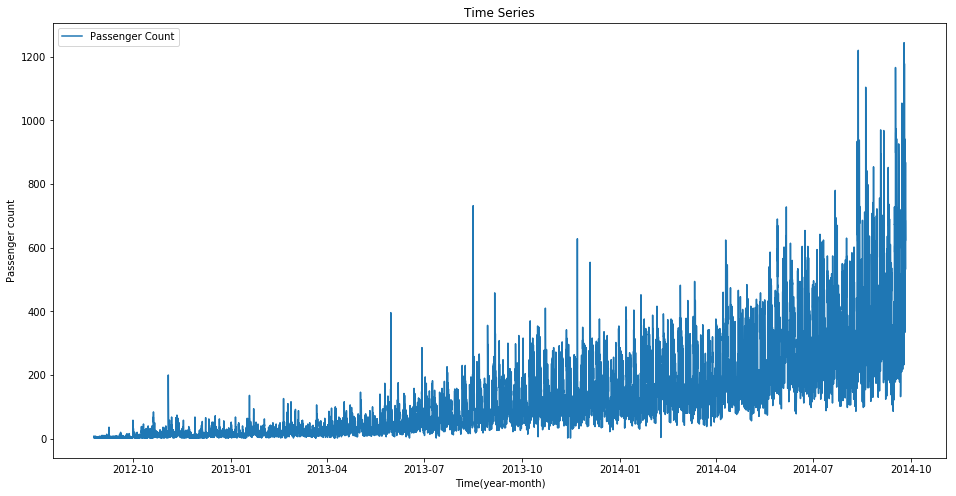

In [41]:
#Time Series
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Lets recall the hypothesis that we made earlier:

Traffic will increase as the years pass by
Traffic will be high from May to October
Traffic on weekdays will be more
Traffic during the peak hours will be high



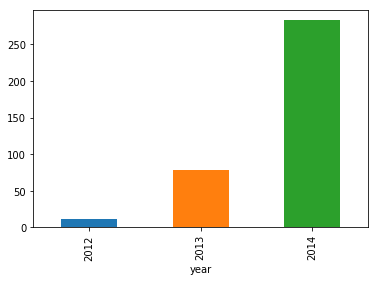

In [42]:
#1) Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

train.groupby('year')['Count'].mean().plot.bar()

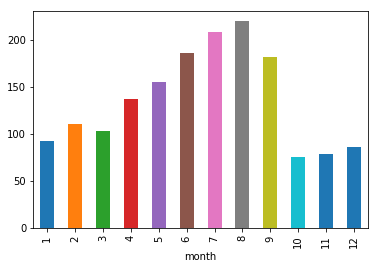

In [44]:
#Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

train.groupby('month')['Count'].mean().plot.bar()



C:\Users\COM\Anaconda3a\lib\site-packages\pandas\core\indexes\multi.py:1565: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if lab[key] == -1:
C:\Users\COM\Anaconda3a\lib\site-packages\pandas\core\indexes\multi.py:1568: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  retval.append(lev[lab[key]])


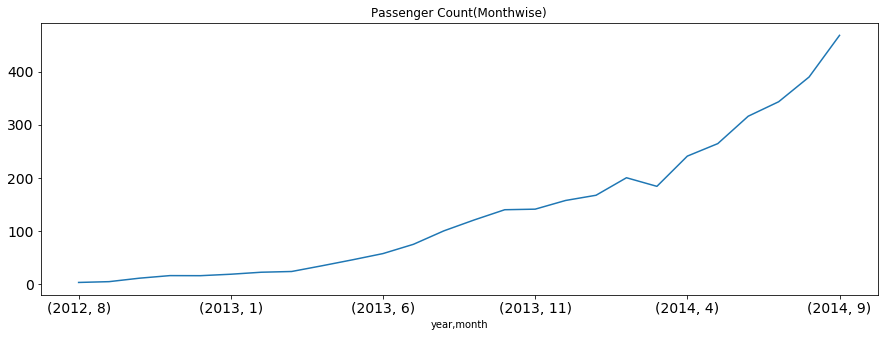

In [45]:
#Let’s look at the monthly mean of each year separately.

temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

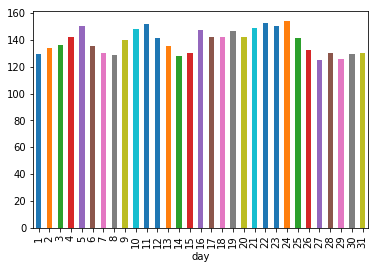

In [46]:
#Let’s look at the daily mean of passenger count.

train.groupby('day')['Count'].mean().plot.bar()

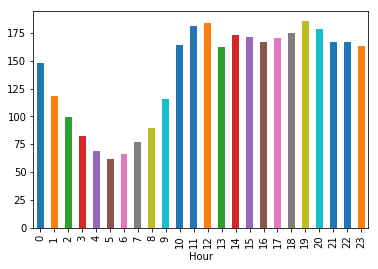

In [47]:
#We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

train.groupby('Hour')['Count'].mean().plot.bar()

It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

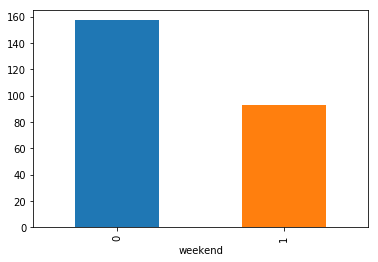

In [48]:
#Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

train.groupby('weekend')['Count'].mean().plot.bar()

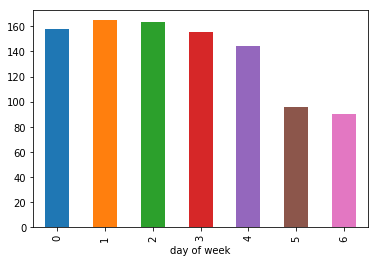

In [49]:
#we will try to look at the day wise passenger count.
#Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

train.groupby('day of week')['Count'].mean().plot.bar()

In [50]:
train=train.drop('ID',1)

As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [51]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

C:\Users\COM\Anaconda3a\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


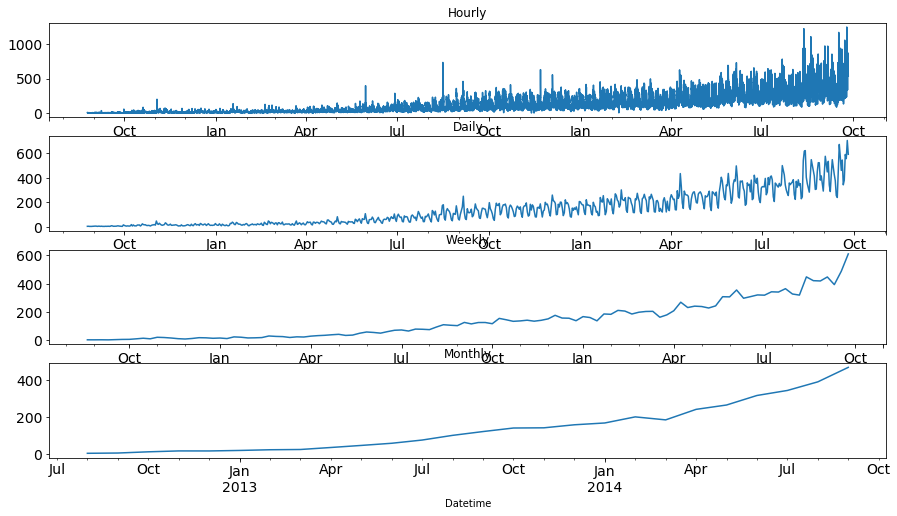

In [53]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

In [55]:
#We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

#But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

C:\Users\COM\Anaconda3a\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
